In [10]:

# import pandas as pd for importing the data and working with data
import pandas as pd
column_names = ["bkblk","bknwy","bkon8","bkona","bkspr","bkxbq","bkxcr","bkxwp",
                "blxwp","bxqsq","cntxt","dsopp","dwipd","hdchk","katri","mulch",
                "qxmsq","r2ar8","reskd","reskr","rimmx","rkxwp","rxmsq","simpl",
                "skach","skewr","skrxp","spcop","stlmt","thrsk","wkcti","wkna8",
                "wknck","wkovl","wkpos","wtoeg", "target"]

df = pd.read_csv('./chess/kr-vs-kp.data',header=None, names=column_names)
df.head()


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,target
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
# Transformar las variables categóricas en numéricas:
# Dado que todas las características son categóricas, usaremos LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicar el método Filter usando SelectKBest:
# Para problemas de clasificación, usaremos f_classif
X = df.drop('target', axis=1)
y = df['target']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

scores = selector.scores_

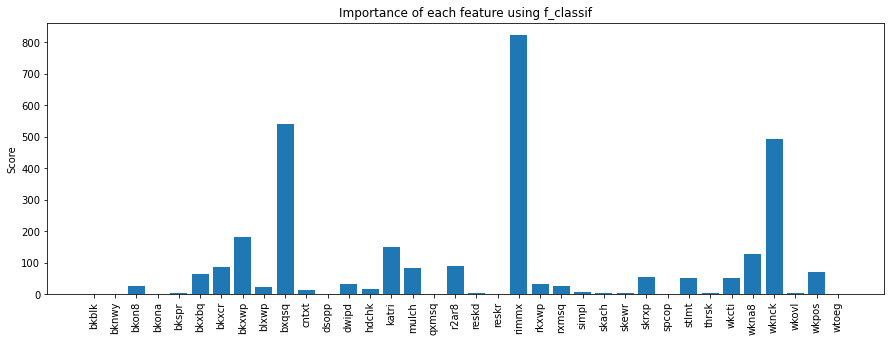

In [13]:
import matplotlib.pyplot as plt
# Gráfico de barras con la importancia de cada característica:

plt.figure(figsize=(15,5))
plt.bar(X.columns, scores)
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.title('Importance of each feature using f_classif')
plt.show()
